**Objective Of Customer Churn Prediction**


The objective of this customer churn prediction project is to leverage machine learning to forecast whether customers are inclined to leave the company's services or stay. This prediction relies on a diverse set of customer attributes, including age, gender, location, subscription duration, monthly billing amount, and total data usage. The core goal of the model is to proactively identify customers who exhibit a higher likelihood of churning, which empowers the business to take preemptive actions aimed at retaining them.



# Importing The Libraries

In [1]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation, Dropout
from kerastuner.tuners import RandomSearch

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

<ipython-input-2-190282ff4003>:24: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [3]:
# Reading the data
df = pd.read_excel('/content/customer_churn_large_dataset.xlsx')

# Understanding The Data

In [4]:
# Display Dataset
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


The data set includes information about:

*   Customers who left within the last month – the column is called Churn, values are binary (0 or 1), indicating whether a customer has churned or not.

*   Services that each customer has signed up for – Subscription_Length_Months, Total_Usage_GB
*   Customer account information - Monthly_Bill
*   Demographic info about customers – gender, age

In [5]:
# Shapae of the dataset
df.shape

(100000, 9)

In [6]:
df.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [8]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [9]:
# Get unique values from the 'Location' column
unique_locations = df['Location'].unique()
unique_locations

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [10]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


1. Age:

The average age is 44.03 years and the age distribution has a standard deviation of 15.
28, suggesting some variability in ages.

The youngest customer is 18 years old and the oldest customer is 70 years old.


2. Subscription_Length_Months:

The average subscription length is 12.49 months and the standard deviation is 6.93 months, indicating variability in subscription lengths.

The shortest subscription length is 1 month and the longest subscription length is 24 months.


3. Monthly_Bill:

The average monthly bill amount is 65.05 dollars and the standard deviation is 20.23 dollars, indicating some variability in monthly bills.

The minimum monthly bill amount is 30.00 dollars and the maximum monthly bill amount is 100.00 dollars.


4. Total_Usage_GB:

The average total usage is 274.39 GB and the standard deviation is 130.46 GB, indicating variability in usage.

The minimum total usage is 50.00 GB and the maximum total usage is 500.00 GB.


5. Churn:

The average churn rate is approximately 0.50, suggesting that around 50% of customers have churned (1) and 50% have not (0) and the standard deviation is close to 0.5, indicating a relatively even distribution between churned and non-churned customers.

The minimum churn value is 0 (no churn) and the maximum churn value is 1 (churned).


6. Total_Bill:

The average total bill amount is 811.78 dollars and the standard deviation is 533.86 dollars, indicating variability in total bills.

The minimum total bill amount is 30.06 dollars and the maximum total bill amount is 2,399.52 dollars.

# Data Visualization

In [11]:
# Count occurrences of 'Male' and 'Female' in the 'Gender' column
gender_counts = df['Gender'].value_counts()

print(gender_counts)

Female    50216
Male      49784
Name: Gender, dtype: int64


In [12]:
# Count occurrences of different locations in the 'Location' column
location_counts = df['Location'].value_counts()

print(location_counts)

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64


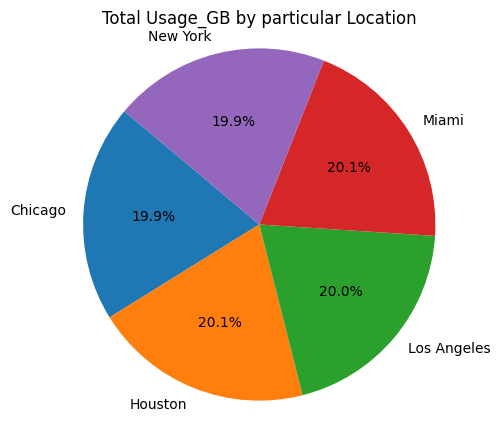

In [13]:
# Group the data by 'Age' and calculate the total usage for each age group
age_usage = df.groupby('Location')['Total_Usage_GB'].sum()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(age_usage, labels=age_usage.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Usage_GB by particular Location')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

Every location has almost equal amount of data usage.

# Data Pre-Processing

Data preprocessing is a critical step in the data analysis and machine learning pipeline. It involves cleaning, transforming, and organizing raw data into a format suitable for analysis or modeling. Proper data preprocessing can significantly impact the quality and effectiveness of your machine learning models. Here are the key steps involved in data preprocessing:

In [14]:
#checking for null values
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

As from the above we see there is no missing value is present.

In [15]:
# Droping the unnecessary column as it is no use of this column
df.drop(['Name','CustomerID'], inplace=True, axis=1)

**Feature Creation:**



As we have 'Subscription_Length_Months' and 'Monthly_Bill' columns.so, we can create a column 'Total_Bill' column, which shows the total bill of per user.

In [16]:
# Feature Creation of creating a seperate column 'Total_Bill'
df['Total_Bill'] = df['Subscription_Length_Months'] * df['Monthly_Bill']

**Correlation Graph**
Let's visualize the correlation through heatmap.

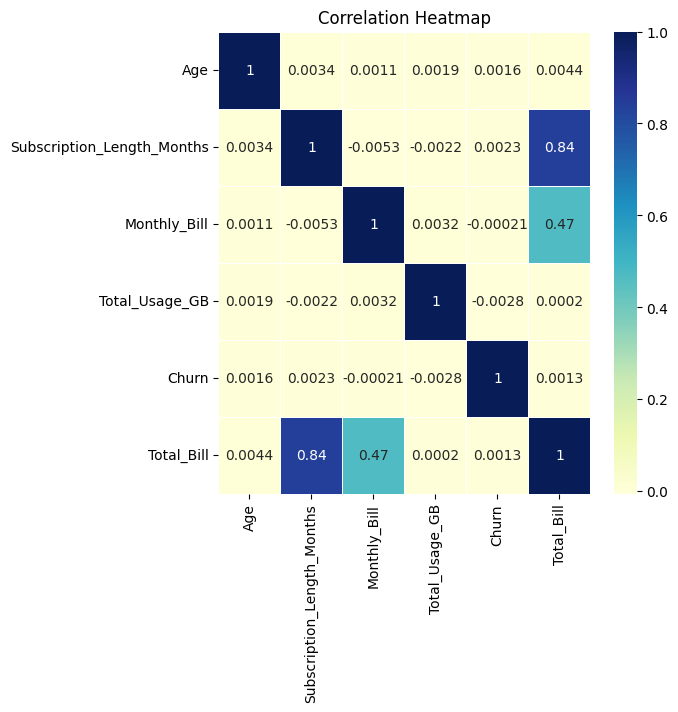

In [17]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

As we can analyze, theres a high correlation between 'Subscription_Length_Months' and 'Total_Bill' columns.

(-1 signifies zero correlation, while 1 signifies a perfect correlation)

Let's create the box plt for each columns to visualiza the outliers.

In [18]:
# Numeric columns
numerci_col = ['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Total_Bill']

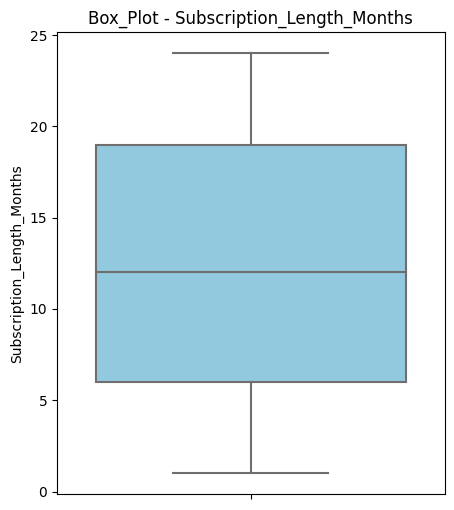

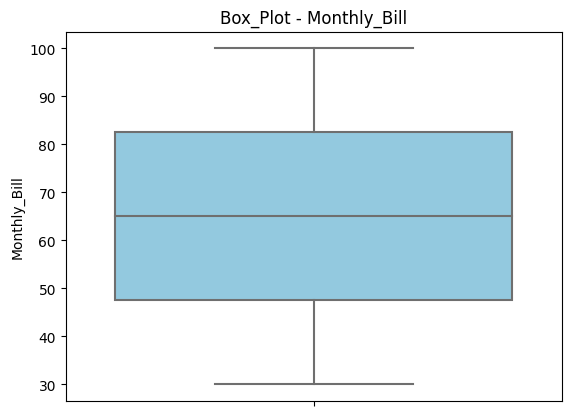

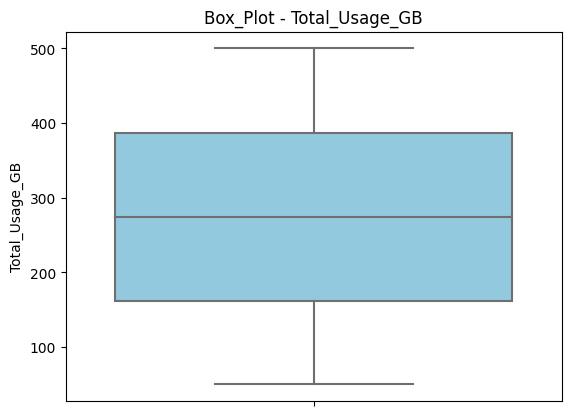

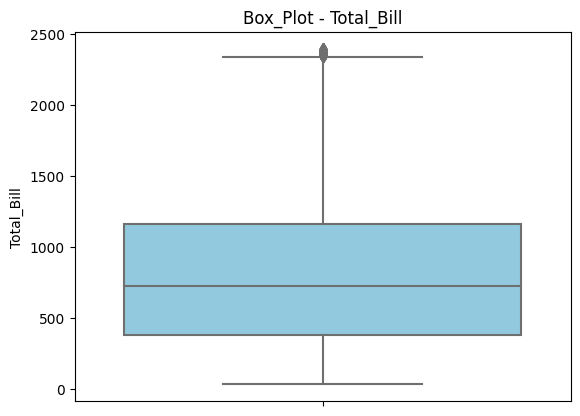

In [19]:
# Adjust the figure size if needed
plt.figure(figsize=(5, 6))

# Loop through each column
for col in numerci_col:
    sns.boxplot(y=df[col], color='skyblue', orient='v')
    plt.title(f'Box_Plot - {col}')
    plt.show()

From above plots, we can see there are few outliers in the 'Toatal_Bill' column.

Let's implement IQR, to count the number of outliers and filter out them from our dataset.

In [20]:
Q1 = np.percentile(df['Total_Bill'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df['Total_Bill'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df['Total_Bill'], 75, interpolation = 'midpoint')

print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)

IQR = Q3 - Q1
print('IQR :', IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

Q1 25 percentile of the given data is,  378.24
Q1 50 percentile of the given data is,  726.3399999999999
Q1 75 percentile of the given data is,  1161.875
IQR : 783.635
low_limit is -797.2124999999999
up_limit is 2337.3275


In [21]:
# Count the no of outliers
outlier =[]
for x in df['Total_Bill']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)

print(' Length of total outliers is', len(outlier))
print(' outlier in the dataset is', outlier)

 Length of total outliers is 139
 outlier in the dataset is [2396.88, 2381.7599999999998, 2377.44, 2337.6000000000004, 2343.84, 2348.64, 2342.88, 2391.6000000000004, 2340.0, 2361.36, 2382.48, 2398.8, 2352.2400000000002, 2358.48, 2382.48, 2373.6000000000004, 2375.04, 2382.0, 2350.56, 2396.16, 2370.96, 2394.0, 2344.08, 2341.68, 2347.44, 2345.52, 2373.12, 2360.64, 2348.88, 2340.2400000000002, 2343.84, 2393.7599999999998, 2355.12, 2369.04, 2378.64, 2353.44, 2352.96, 2364.7200000000003, 2396.88, 2399.52, 2385.12, 2389.92, 2394.0, 2368.8, 2343.36, 2397.12, 2364.0, 2337.36, 2384.64, 2389.44, 2364.96, 2373.6000000000004, 2351.2799999999997, 2339.2799999999997, 2376.48, 2371.44, 2374.56, 2342.16, 2354.88, 2344.08, 2345.7599999999998, 2359.44, 2361.84, 2355.12, 2342.88, 2392.8, 2398.8, 2375.7599999999998, 2375.2799999999997, 2382.96, 2339.52, 2375.04, 2398.56, 2394.7200000000003, 2383.44, 2360.16, 2398.8, 2391.36, 2373.36, 2392.56, 2384.3999999999996, 2364.0, 2397.12, 2363.7599999999998, 2348.64

As we have very less outliers.
So, we can simply remove the outliers.

In [22]:
# Filter out rows with values outside the Upper and Lower Limits
df = df[(df['Total_Bill'] >= low_lim) & (df['Total_Bill'] <= up_lim)]

In [23]:
# Shape after removal of outliers
df.shape

(99861, 8)

# Feature Engineering

Feature engineering is the process of creating new features or modifying existing ones in a dataset to improve the performance of a machine learning model. It involves selecting, transforming, or generating features that provide valuable information to the model, enhance its predictive power, and help it generalize better to unseen data. Effective feature engineering can have a significant impact on the success of a machine learning project.

Label-encoding of 'Gender' column

In [24]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "Gender" column
df['Gender'] = label_encoder.fit_transform(df['Gender'])

One-hot encodinng of 'Location' column

In [25]:
# Perform one-hot encoding using pd.get_dummies
df = pd.get_dummies(df, columns=['Location'], drop_first = True)

In [26]:
df.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Bill,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,1,17,73.36,236,0,1247.12,0,1,0,0
1,62,0,1,48.76,172,0,48.76,0,0,0,1
2,24,0,5,85.47,460,0,427.35,0,1,0,0
3,36,0,3,97.94,297,1,293.82,0,0,1,0
4,46,0,19,58.14,266,0,1104.66,0,0,1,0


Plot the distribution of each continuous variable.



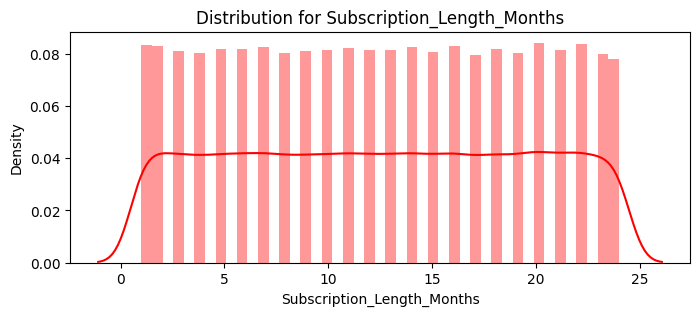

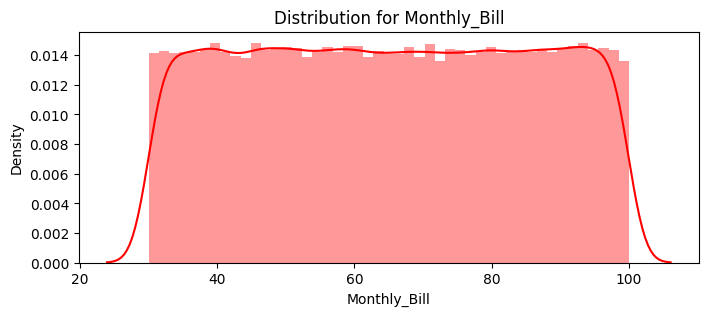

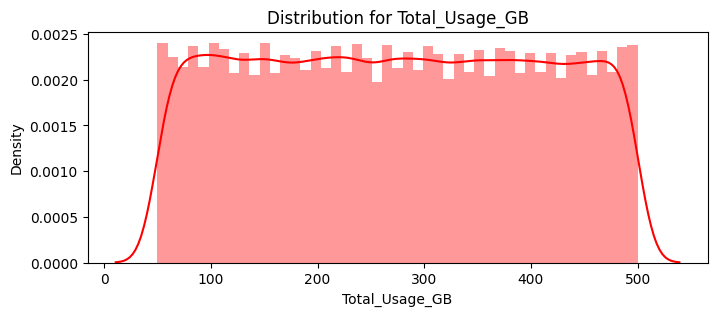

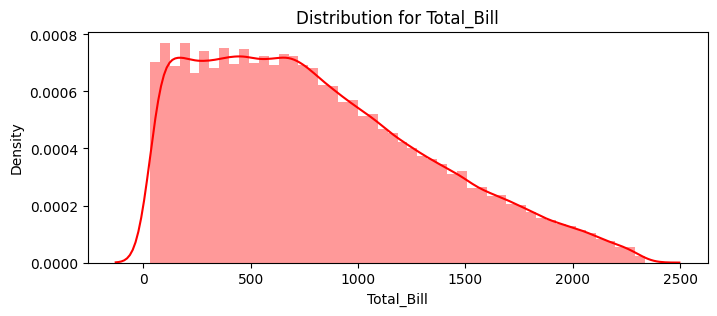

In [27]:
# continuous variable columns
num_cols = ["Subscription_Length_Months", 'Monthly_Bill', 'Total_Usage_GB', 'Total_Bill']

for feature in num_cols:
    plt.figure(figsize=(8, 3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(df[feature], color='r')
    plt.show()

From the above plots, We can say that numeric features 'Total_Bill' are distributed on different ranges.
So, we apply standardization on the numeric columns, where mean = 0 and standard_deviation = 1.

There's a skewness in 'Total_Bill' column, so I will try to use 'log' or 'Box-Cox' transfomation and then deploy model.

I will try to see with 'Standard Scaler' tenchnique as well.

Let's perform Log-transformation on 'Total_Bill' column.

In [28]:
# Assuming 'Total_Bill' is the column you want to transform
df['Total_Bill'] = np.log(df['Total_Bill'] + 1)  # Adding 1 to handle zero values

df.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Bill,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,1,17,73.36,236,0,7.129394,0,1,0,0
1,62,0,1,48.76,172,0,3.907211,0,0,0,1
2,24,0,5,85.47,460,0,6.059941,0,1,0,0
3,36,0,3,97.94,297,1,5.686365,0,0,1,0
4,46,0,19,58.14,266,0,7.008198,0,0,1,0


In [29]:
# Initialize the StandardScaler
scaler = StandardScaler()

num_cols = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Total_Bill']

# Fit and transform the selected columns
df[numerci_col] = scaler.fit_transform(df[numerci_col])

In [30]:
df.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Bill,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,1,0.654232,0.413424,-0.294100,0,0.828342,0,1,0,0
1,62,0,-1.658604,-0.804050,-0.784622,0,-2.847632,0,0,0,1
2,24,0,-1.080395,1.012758,1.422724,0,-0.391726,0,1,0,0
3,36,0,-1.369500,1.629908,0.173428,1,-0.817914,0,0,1,0
4,46,0,0.943337,-0.339826,-0.064169,0,0.690077,0,0,1,0


# Train-Test Split

In [31]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(69902, 10)
(29959, 10)
(69902,)
(29959,)


Let's check the imbalance class.

In [34]:
# Count number of occurence of different chunk values
class_counts = df['Churn'].value_counts()

print(class_counts)

0    50149
1    49712
Name: Churn, dtype: int64


# Feature Selection

Feature selection using a **Random Forest** is a popular and effective technique in machine learning. Random Forests can provide feature importance scores, which indicate the contribution of each feature to the model's predictive performance. You can use these scores to select the most important features for your model. Here's a step-by-step guide on how to perform feature selection using a Random Forest:

In [35]:
# Implement Random Forest for feature selection
model_rf = RandomForestClassifier(n_estimators=100,
                                  oob_score = True,
                                  n_jobs = -1,
                                  random_state =42,
                                  max_features = "auto",
                                  max_leaf_nodes = 30)

# Fit the model on the training data
model_rf.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = model_rf.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importances_df

,Feature,Importance
0,Age,0.138668
1,Gender,0.018571
2,Subscription_Length_Months,0.074271
3,Monthly_Bill,0.264057
4,Total_Usage_GB,0.199345
5,Total_Bill,0.258275
6,Location_Houston,0.011400
7,Location_Los Angeles,0.010576
8,Location_Miami,0.015490
9,Location_New York,0.009347


Here, "Monthly_Bill" and "Total_Bill" have relatively high importance scores, suggesting that these two features have a significant impact on your model's predictions and features with low importance scores (e.g., "Location_New York" and "Location_Los Angeles") are less influential.

In this case, it seems I have to use an ensemble method (e.g., Random Forest or XGBoost), which provides feature importances as part of its output.

# Check Multi-Colinearity

The Variance Inflation Factor (VIF) is a measure used to assess multicollinearity in a dataset. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, which can lead to unstable coefficient estimates and difficulty in interpreting the model.

In [36]:
# Create an empty DataFrame to store VIF values
vif = pd.DataFrame()

# Add the names of the features to the 'Variable' column and calculate the VIF for each feature.
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values(by='VIF', ascending=False)

vif

,Variable,VIF
5,Total_Bill,8.023775
2,Subscription_Length_Months,6.942888
0,Age,3.870856
3,Monthly_Bill,2.142774
1,Gender,1.853844
6,Location_Houston,1.647739
8,Location_Miami,1.647078
7,Location_Los Angeles,1.640102
9,Location_New York,1.637662
4,Total_Usage_GB,1.000094


Here, We can analyze 2 points:


*   Variables with high VIF values (e.g., Total_Bill and Subscription_Length_Months) are likely to be strongly correlated with other variables in the dataset.
*   Variables with low VIF values (e.g., Total_Usage_GB and Location_New York) have lower multicollinearity and are less correlated with other variables.


The VIF values indicate the extent of multicollinearity in the dataset. A common rule of thumb is that a VIF value greater than 5 or 10 suggests high multicollinearity, although the threshold may vary depending on the context.

*   VIF < 1: No multicollinearity.
*   1 < VIF < 5: Moderate multicollinearity.
*   VIF >= 5: High multicollinearity.


# Machine Learning Model Evaluations and Predictions

In [37]:
# Create a result dictionary for training data of different models
results_train = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': []}

# Create result dictionary for testing data of different models
results_test = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': []}

**Use Different Ensembel Models As Well**

In [38]:
# Implement Different models
models = [LogisticRegression(),
          KNeighborsClassifier(n_neighbors = 11),
          SVC(random_state = 42),
          DecisionTreeClassifier(random_state=42),
          RandomForestClassifier(n_estimators=100, oob_score = True, n_jobs = -1, random_state =42, max_leaf_nodes = 30),
          AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42)),
          GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42),
          XGBClassifier(n_estimators=100, n_jobs=-1, random_state=42),
          ExtraTreesClassifier(n_estimators=100, max_depth=3, random_state=42),]

In [39]:
# Call each model and measure different performance metrics on training data
for model in models:

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict the target labels on the training data
    y_pred = model.predict(X_train)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average='weighted')
    recall = recall_score(y_train, y_pred, average='weighted')
    f1 = f1_score(y_train, y_pred, average='weighted')

    # Append the metrics and model name to the results_train dictionary
    results_train['Model'].append(type(model).__name__)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)

# Create a dataframe for the test data results
results_train_df = pd.DataFrame(results_train)
results_train_df

,Model,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.505422,0.505179,0.505422,0.483427
1,KNeighborsClassifier,0.624117,0.624123,0.624117,0.624063
2,SVC,0.502732,0.252740,0.502732,0.336374
3,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
4,RandomForestClassifier,0.553618,0.569983,0.553618,0.523121
5,AdaBoostClassifier,1.000000,1.000000,1.000000,1.000000
6,GradientBoostingClassifier,0.537538,0.539047,0.537538,0.530963
7,XGBClassifier,0.651584,0.652342,0.651584,0.650992
8,ExtraTreesClassifier,0.509056,0.511481,0.509056,0.461287


Models like Decision Tree, AdaBoost, and SVC achieved perfect scores on the training data, which is often indicative of overfitting.

Some models, such as Decision Tree and Random Forest, offer more interpretability than others like XGBoost.

I think Hyperparameter tuning and feature engineering of XGBoost can often improve model performance.

In [40]:
# Call each model and measure different performance metrics on testing data
for model in models:

    # Fit the model on the testing data
    y_test_pred = model.predict(X_test)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Append the metrics and model name to the results_test dictionary
    results_test['Model'].append(type(model).__name__)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a dataframe for the test data results
results_test_df = pd.DataFrame(results_test)
results_test_df

,Model,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.497714,0.496779,0.497714,0.475022
1,KNeighborsClassifier,0.497179,0.497160,0.497179,0.497118
2,SVC,0.500918,0.250919,0.500918,0.334354
3,DecisionTreeClassifier,0.502987,0.502983,0.502987,0.502983
4,RandomForestClassifier,0.497847,0.496449,0.497847,0.462573
5,AdaBoostClassifier,0.501185,0.501180,0.501185,0.501178
6,GradientBoostingClassifier,0.498682,0.498369,0.498682,0.491342
7,XGBClassifier,0.499382,0.499295,0.499382,0.498353
8,ExtraTreesClassifier,0.499149,0.497812,0.499149,0.449526


As, here models like AdaBoost and GradientBoostingClassifier may perform well due to their ensemble nature, which combines multiple weak learners.

I think, XGBoost appears to have relatively balanced performance across metrics, which can make it a good candidate for further tuning.

So, Let's try hyper-parameter tunning on XGBoost.

# Hyperparameter Tunning

Hyperparameter tuning is a critical process in machine learning model development that aims to find the best combination of hyperparameters to optimize model performance. Hyperparameters are settings that are predetermined before training and are not learned from the data. Examples include minimum no of samples split, learning rate, tree depths, and the number of estimators in ensemble methods.

In [41]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    objective='binary:logistic',
    random_state=42)

# Fit the model on the testing data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [42]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'learning_rate': [0.1, 0.01]
}

# Initialize GridSearchCV with recall as the scoring metric
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='recall',
    cv=5
)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...one,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [10, 20],
                         'n_estimators': [50, 100]},
             scoring='recall')

In [43]:
# Get the best model from the search
best_xgb = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_test_pred = best_xgb.predict(X_test)

# Calculate recall for the test set
test_recall = recall_score(y_test, y_test_pred)

print("Parameters Utilized: ", grid_search.best_params_)
print(f"Test Recall:  {test_recall:.4f}")

Parameters Utilized:  {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100}
Test Recall:  0.4868


Here, Also we are getting the same performance.

# Cross Validation

Cross-validation is a resampling technique commonly used in machine learning for assessing the performance of a predictive model. It provides a more robust evaluation of a model's ability to generalize to unseen data compared to a simple train-test split. Cross-validation is particularly useful when you have a limited dataset, and you want to make efficient use of the available data for both training and evaluation.

Types:

k-Fold Cross-Validation: The dataset is divided into k equally sized folds, and the model is trained and tested k times.

In [44]:
# cross validation of
scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

print("Cross-Validation Scores (Accuracy):", scores)
print(f"Mean Accuracy Score: {scores.mean():.4f}")

Cross-Validation Scores (Accuracy): [0.50768901 0.50396967 0.50472103 0.50844063 0.49771102]
Mean Accuracy Score: 0.5045


In [45]:
# cross validation of recall
scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='recall', n_jobs=-1)

print("Cross-Validation Scores (Accuracy):", scores)
print(f"Mean Recall Score: {scores.mean():.4f}")

Cross-Validation Scores (Accuracy): [0.4702244  0.47540276 0.47569045 0.47525892 0.46634062]
Mean Recall Score: 0.4726


Although, cross validatin accuracy as well as recall score also remain same.

# Confusion Matrix

A confusion matrix is a table used in machine learning and statistics to evaluate the performance of a classification model. It helps assess how well a model's predictions align with the actual classes or labels in a dataset. The confusion matrix provides a clear and detailed breakdown of prediction results, allowing you to calculate various performance metrics.

A standard confusion matrix consists of four values:



*   True Positives (TP): The number of instances correctly predicted as the positive class.
*   True Negatives (TN): The number of instances correctly predicted as the negative class.


*   False Positives (FP): The number of instances incorrectly predicted as the positive class (Type I error).
*   False Negatives (FN): The number of instances incorrectly predicted as the negative class (Type II error).


In [46]:
classification_rep = classification_report(y_test, y_test_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.50      0.51      0.51     15007
           1       0.50      0.49      0.49     14952

    accuracy                           0.50     29959
   macro avg       0.50      0.50      0.50     29959
weighted avg       0.50      0.50      0.50     29959



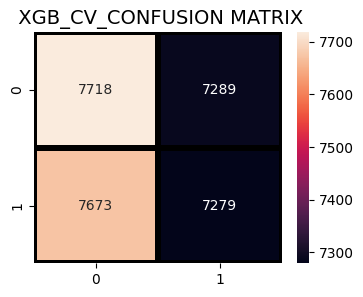

In [47]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt = "d", linecolor="k", linewidths=3)
plt.title(" XGB_CV_CONFUSION MATRIX",fontsize=14)
plt.show()

# Neural Network Architecture

Designing a neural network architecture involves making decisions about various aspects of the network, including the number of layers, the number of neurons in each layer, the activation functions, and the architecture's overall structure. The choice of architecture depends on the specific machine learning task, the complexity of the problem, and the available data.

I will use Keras Tunner and Early Stopping

1. Keras Tuner is an open-source library for hyperparameter tuning of deep learning models built using TensorFlow and Keras. It provides a high-level API to search for the best hyperparameters, such as learning rate, number of layers, number of neurons, and dropout rates, to optimize the performance of your neural networks. Keras Tuner supports various tuning strategies, including random search, grid search, and Bayesian optimization.

2. Early stopping is a technique that stops the training of a model when the validation loss stops improving. If you set restore_best_weights to False, the model will be saved at the end of the training, even if the validation loss has not improved. This could result in the model being saved at a point where it is overfitting the training data. By setting restore_best_weights to True, the model will be saved at the epoch with the best validation loss. This ensures that the model that is saved is the one that is most likely to generalize well to new data.

In [48]:
# Define the model
def build_model(hp):
    model = Sequential()

    # Input layer
    model.add(Dense(32, kernel_initializer='he_normal', activation='relu', input_dim=10))

    # First hidden layer
    model.add(Dense(32, kernel_initializer='he_normal',activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.33))

    # Second hidden layer
    model.add(Dense(16, kernel_initializer='he_normal', activation="relu"))
    model.add(BatchNormalization())

    # Third hidden layer
    model.add(Dense(8, kernel_initializer='he_normal', activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    # Output layer with Sigmoid activation
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [49]:
# Initialize the tuner
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5,
                     executions_per_trial=3)

# Add early stopping
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Run the hyperparameter search
tuner.search(X_train, y_train,
             epochs=10,
             validation_split=0.3,
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)
best_model.summary()

Trial 1 Complete [00h 06m 17s]
val_accuracy: 0.5055552919705709

Best val_accuracy So Far: 0.5055552919705709
Total elapsed time: 00h 06m 17s
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                352       
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                            

In [50]:
# Train the best model
history = best_model.fit(
    X_train, y_train,
    epochs=20,
    validation_split=0.3,
    callbacks=[stop_early])

Epoch 1/20
1530/1530 [==============================] - 14s 7ms/step - loss: 0.7402 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.5075
Epoch 2/20
1530/1530 [==============================] - 12s 8ms/step - loss: 0.6971 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 3/20
1530/1530 [==============================] - 12s 8ms/step - loss: 0.6940 - accuracy: 0.4974 - val_loss: 0.6933 - val_accuracy: 0.4984
Epoch 4/20
1530/1530 [==============================] - 12s 8ms/step - loss: 0.6934 - accuracy: 0.4983 - val_loss: 0.6931 - val_accuracy: 0.5066
Epoch 5/20
1530/1530 [==============================] - 12s 8ms/step - loss: 0.6934 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 6/20
1530/1530 [==============================] - 11s 7ms/step - loss: 0.6933 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5067
Epoch 7/20
1530/1530 [==============================] - 11s 7ms/step - loss: 0.6933 - accuracy: 0.4966 - val_loss: 0.6931 - val_ac

As, we can see it doesn't give a good performance.

In [51]:
loss, accuracy = best_model.evaluate(X_test, y_test, batch_size=16)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

1873/1873 [==============================] - 5s 3ms/step - loss: 0.6933 - accuracy: 0.5009
Test Loss: 0.6933
Test Accuracy: 0.5009


As, ANN also giving the same result.

# Final Save The Model

In [52]:
# Deploy the model using `pickle` module
import pickle

In [53]:
# Save the trained model using pickle
with open("XGB_Churn_Classifier.pkl", "wb") as model_file:
    pickle.dump(xgb_model, model_file)

**Outcome of Customer Churn Prediction**

The implementation of the model brings valuable benefits to the company. It facilitates the identification of at-risk customers, enabling the business to allocate resources efficiently. Moreover, the model allows for the customization of engagement strategies, ensuring that interactions with customers are more tailored to their needs. This, in turn, leads to increased customer satisfaction. Ultimately, the success of this project is gauged by the model's accuracy in making predictions. A successful model aids the company in diminishing churn rates, elevating customer contentment, and streamlining customer retention initiatives.




